# Exploratory Data Analysis - Employee Dimension Data
This notebook performs EDA on the `dim_employees_anon.csv` file from the Data Edge Internal Data folder.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Set Data Directory Path
data_dir = r"c:\Users\guine\Documents\BC#4\Hyper_python\BI project\Data Edge Internal Data"
file_path = os.path.join(data_dir, "fct__fortnox_supplier_invoices.csv")

# Verify file exists
if os.path.exists(file_path):
    print(f"✓ File found: {file_path}")
    print(f"File size: {os.path.getsize(file_path)} bytes")
else:
    print(f"✗ File not found: {file_path}")

✓ File found: c:\Users\guine\Documents\BC#4\Hyper_python\BI project\Data Edge Internal Data\fct__fortnox_supplier_invoices.csv
File size: 37395 bytes


In [3]:
# Load Employee Data
try:
    df_supplier_invoices = pd.read_csv(file_path)
    print("✓ Data loaded successfully!")
    print(f"Dataset shape: {df_supplier_invoices.shape}")
except Exception as e:
    print(f"✗ Error loading data: {e}")

✓ Data loaded successfully!
Dataset shape: (748, 5)


## Dataset Overview

In [4]:
# Basic Information
print("=== BASIC INFORMATION ===")
print(f"Shape: {df_supplier_invoices.shape}")
print(f"Columns: {list(df_supplier_invoices.columns)}")
print(f"Data types:\n{df_supplier_invoices.dtypes}")
print(f"\nMemory usage: {df_supplier_invoices.memory_usage(deep=True).sum() / 1024:.2f} KB")

=== BASIC INFORMATION ===
Shape: (748, 5)
Columns: ['invoice_payment', 'categorization', 'invoice_date', 'due_date', 'final_pay_date']
Data types:
invoice_payment    float64
categorization      object
invoice_date        object
due_date            object
final_pay_date      object
dtype: object

Memory usage: 200.31 KB


In [5]:
# First Few Rows
print("=== FIRST 5 ROWS ===")
display(df_supplier_invoices.head())

print("\n=== LAST 5 ROWS ===")
display(df_supplier_invoices.tail())

=== FIRST 5 ROWS ===


,invoice_payment,categorization,invoice_date,due_date,final_pay_date
0,296.50,mobile_costs,2019-11-04,2019-11-28,2019-11-26
1,253.20,mobile_costs,2019-10-03,2019-10-27,2019-10-25
2,516.55,mobile_costs,2020-04-01,2020-04-01,2020-04-27
3,452.71,mobile_costs,2020-03-03,2020-03-27,2020-04-08
4,353.05,mobile_costs,2020-02-03,2020-02-27,2020-02-05



=== LAST 5 ROWS ===


,invoice_payment,categorization,invoice_date,due_date,final_pay_date
743,253361.0,Other,2023-12-07,2023-12-29,2023-12-29
744,253361.0,Other,2024-09-11,2024-09-30,2024-09-30
745,257029.0,Other,2025-06-09,2025-06-30,2025-06-30
746,257029.0,Other,2025-03-06,2025-03-31,2025-03-31
747,257029.0,Other,2024-12-05,2024-12-30,2024-12-30


## Data Quality Assessment

In [6]:
# Missing Values Analysis
print("=== MISSING VALUES ===")
missing_data = df_supplier_invoices.isnull().sum()
missing_percent = (missing_data / len(df_supplier_invoices)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

# Duplicates
print(f"\n=== DUPLICATES ===")
print(f"Total duplicated rows: {df_supplier_invoices.duplicated().sum()}")
print(f"Percentage of duplicates: {(df_supplier_invoices.duplicated().sum() / len(df_supplier_invoices)) * 100:.2f}%")

=== MISSING VALUES ===
                Missing Count  Missing Percentage
final_pay_date             19            2.540107

=== DUPLICATES ===
Total duplicated rows: 2
Percentage of duplicates: 0.27%


## Statistical Summary

=== MONTHLY INVOICE TOTALS BY YEAR ===
✓ Using date column: invoice_date
✓ Using amount column: invoice_payment
✓ Successfully converted invoice_date to datetime
Years available: [np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]

--- MONTHLY TOTALS BY YEAR ---

=== 2019 Monthly Totals ===


,Month,Total Payment (2019)
0,July,534.25
1,August,318.75
2,September,1553.62
3,October,1775.20
4,November,36009.50
5,December,4479.79



=== 2020 Monthly Totals ===


,Month,Total Payment (2020)
0,January,4657.000000
1,February,48893.800000
2,March,26886.710000
3,April,6100.550000
4,May,55112.250000
5,June,5616.000000
6,July,31121.250000
7,August,57013.000000
8,September,54918.320000
9,October,76989.408754



=== 2021 Monthly Totals ===


,Month,Total Payment (2021)
0,January,84246.060000
1,February,28412.280000
2,March,123629.690000
3,April,51446.520000
4,May,102128.000000
5,June,47019.980000
6,July,32811.000000
7,August,102118.000000
8,September,248646.600000
9,October,91656.312062



=== 2022 Monthly Totals ===


,Month,Total Payment (2022)
0,January,69835.160
1,February,43737.750
2,March,173612.640
3,April,43813.000
4,May,53387.000
5,June,152127.000
6,July,12662.000
7,August,59284.000
8,September,151905.000
9,October,43251.340



=== 2023 Monthly Totals ===


,Month,Total Payment (2023)
0,January,103436.84
1,February,72174.00
2,March,270253.01
3,April,102243.65
4,May,82005.22
5,June,312363.22
6,July,45957.00
7,August,152344.44
8,September,816296.69
9,October,235656.32



=== 2024 Monthly Totals ===


,Month,Total Payment (2024)
0,January,994915.600
1,February,1229124.000
2,March,4908885.600
3,April,714942.380
4,May,1420147.012
5,June,826872.230
6,July,721758.680
7,August,1612935.850
8,September,893550.680
9,October,495950.055



=== 2025 Monthly Totals ===


,Month,Total Payment (2025)
0,January,554869.39
1,February,1638127.68
2,March,828395.27
3,April,1576565.00
4,May,1621957.36
5,June,341430.83
6,July,133637.54
7,August,1708670.68
8,September,474639.00


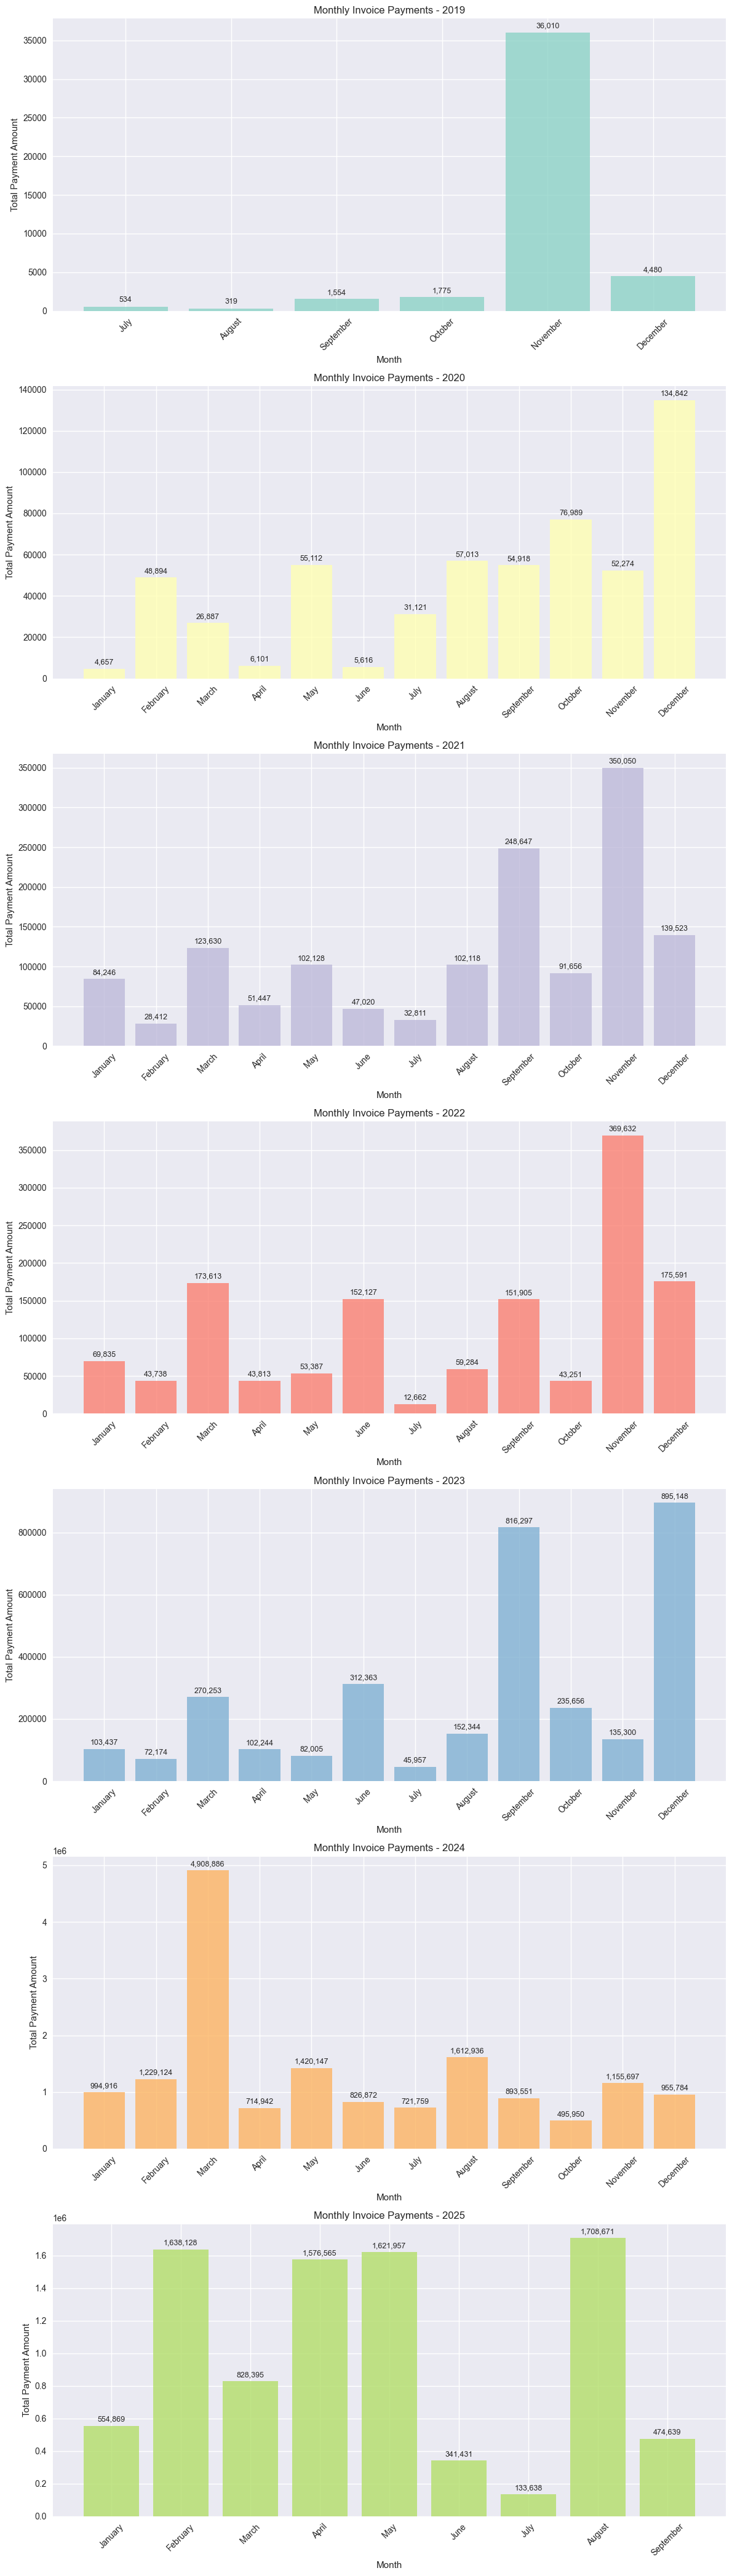


--- YEAR-OVER-YEAR COMPARISON ---


year,2019,2020,2021,2022,2023,2024,2025
month_name,,,,,,,
January,0.00,4657.000000,84246.060000,69835.160,103436.84,994915.600,554869.39
February,0.00,48893.800000,28412.280000,43737.750,72174.00,1229124.000,1638127.68
March,0.00,26886.710000,123629.690000,173612.640,270253.01,4908885.600,828395.27
April,0.00,6100.550000,51446.520000,43813.000,102243.65,714942.380,1576565.00
May,0.00,55112.250000,102128.000000,53387.000,82005.22,1420147.012,1621957.36
June,0.00,5616.000000,47019.980000,152127.000,312363.22,826872.230,341430.83
July,534.25,31121.250000,32811.000000,12662.000,45957.00,721758.680,133637.54
August,318.75,57013.000000,102118.000000,59284.000,152344.44,1612935.850,1708670.68
September,1553.62,54918.320000,248646.600000,151905.000,816296.69,893550.680,474639.00


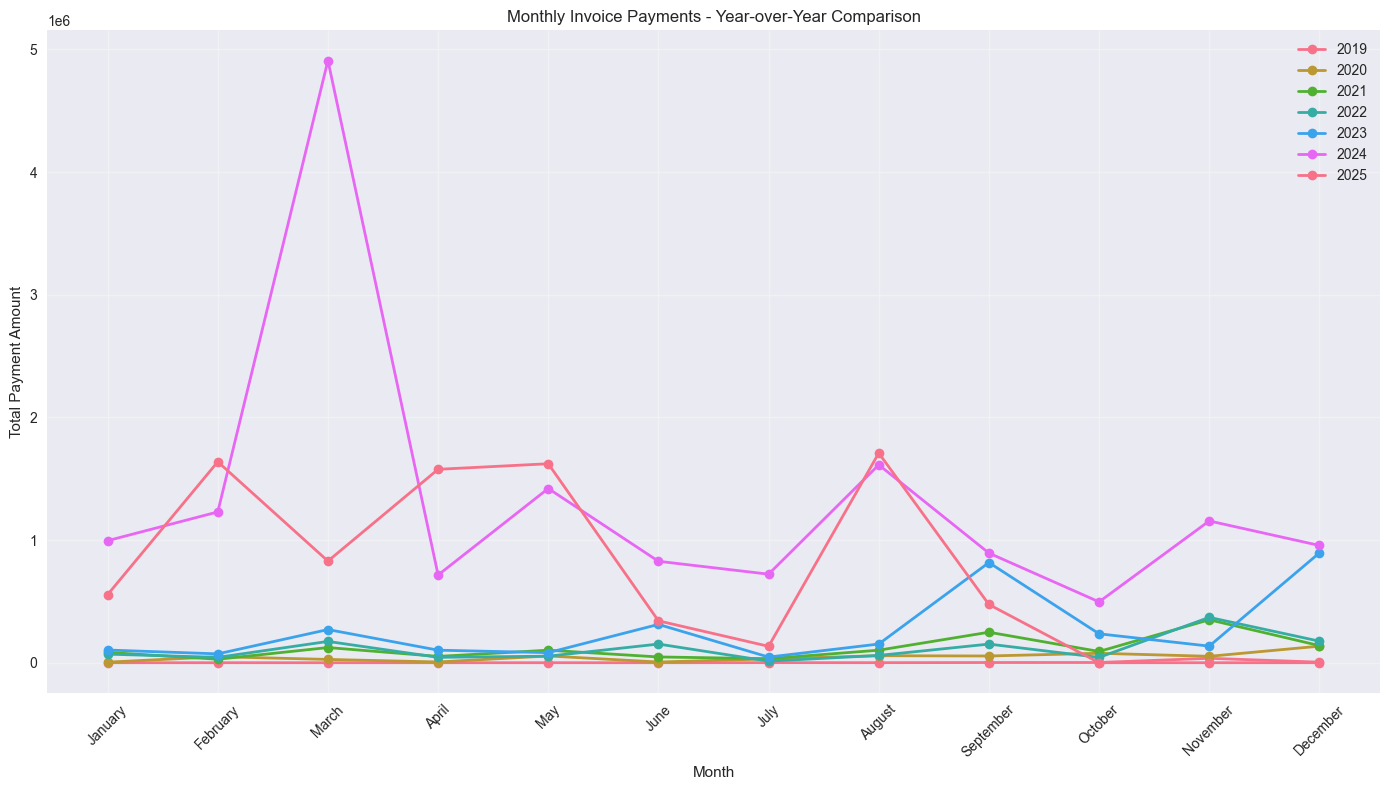

<Figure size 1400x800 with 0 Axes>

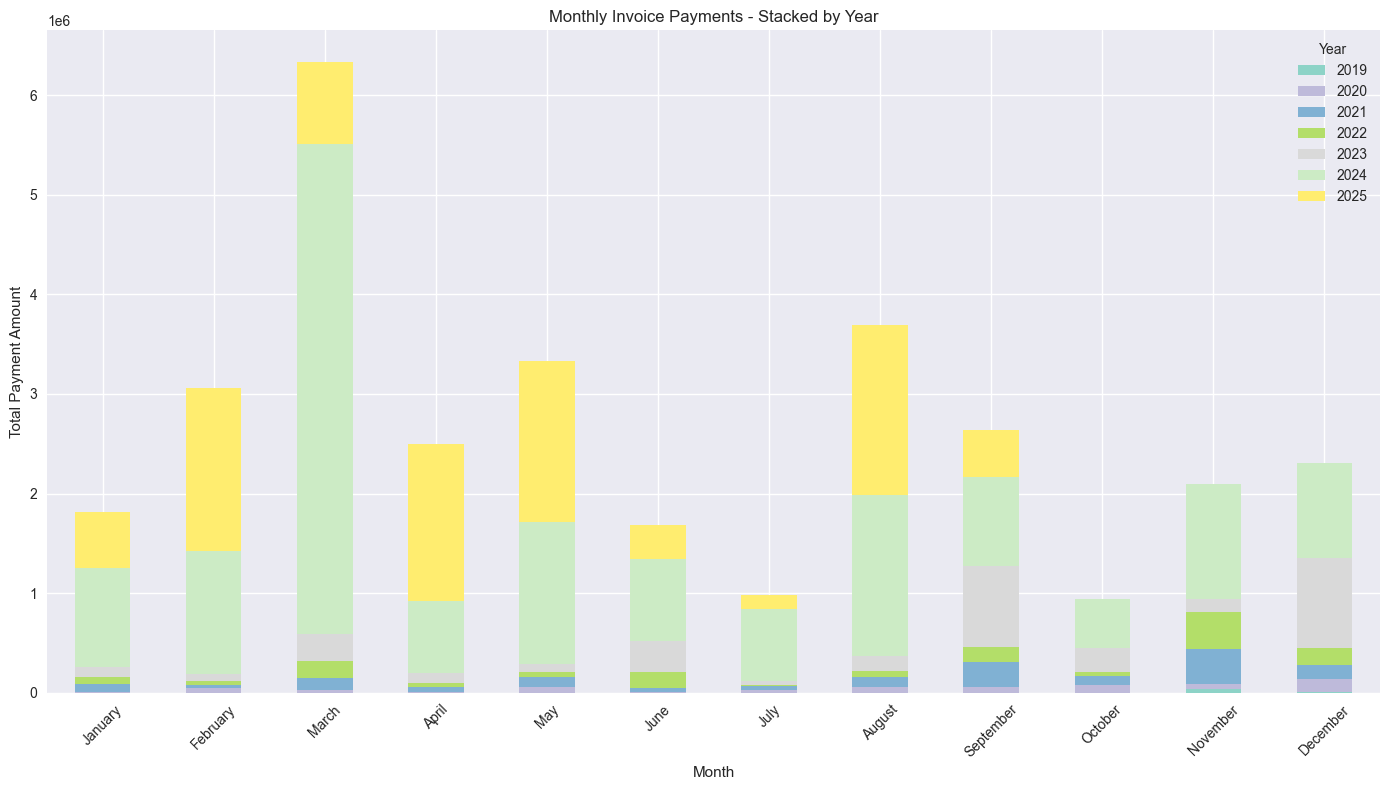


--- YEARLY SUMMARY STATISTICS ---


,Invoice Count,Total Payments,Average Payment,Median Payment,Min Payment,Max Payment
year,,,,,,
2019,17,44671.11,2627.71,442.00,63.0,31796.0
2020,102,554424.74,5435.54,982.50,-3200.0,84000.0
2021,105,1401687.44,13349.40,3050.00,-19091.0,140000.0
2022,89,1348837.76,15155.48,4500.00,0.0,195000.0
2023,126,3223178.54,25580.78,5675.00,-81022.0,496135.0
2024,206,15930563.08,77332.83,3198.68,-2600.0,4000000.0
2025,103,8878292.75,86197.02,3198.68,0.0,1598000.0


In [8]:
# Monthly Invoice Analysis by Year
print("=== MONTHLY INVOICE TOTALS BY YEAR ===")

# Use specific columns as requested
date_col = 'invoice_date'
amount_col = 'invoice_payment'

# Verify columns exist
if date_col in df_supplier_invoices.columns and amount_col in df_supplier_invoices.columns:
    print(f"✓ Using date column: {date_col}")
    print(f"✓ Using amount column: {amount_col}")
    
    # Convert date column to datetime
    try:
        df_supplier_invoices[date_col] = pd.to_datetime(df_supplier_invoices[date_col])
        print(f"✓ Successfully converted {date_col} to datetime")
        
        # Extract year and month
        df_supplier_invoices['year'] = df_supplier_invoices[date_col].dt.year
        df_supplier_invoices['month'] = df_supplier_invoices[date_col].dt.month
        df_supplier_invoices['month_name'] = df_supplier_invoices[date_col].dt.strftime('%B')
        
        # Get unique years
        years = sorted(df_supplier_invoices['year'].dropna().unique())
        print(f"Years available: {years}")
        
        # Create monthly summary for each year
        print("\n--- MONTHLY TOTALS BY YEAR ---")
        
        for year in years:
            year_data = df_supplier_invoices[df_supplier_invoices['year'] == year]
            monthly_totals = year_data.groupby(['month', 'month_name'])[amount_col].sum().reset_index()
            monthly_totals = monthly_totals.sort_values('month')
            
            print(f"\n=== {year} Monthly Totals ===")
            display(monthly_totals[['month_name', amount_col]].rename(columns={
                'month_name': 'Month',
                amount_col: f'Total Payment ({year})'
            }))
        
        # Create visualizations
        fig, axes = plt.subplots(len(years), 1, figsize=(12, 6*len(years)))
        if len(years) == 1:
            axes = [axes]
        
        for i, year in enumerate(years):
            year_data = df_supplier_invoices[df_supplier_invoices['year'] == year]
            monthly_totals = year_data.groupby(['month', 'month_name'])[amount_col].sum().reset_index()
            monthly_totals = monthly_totals.sort_values('month')
            
            # Bar chart for each year
            axes[i].bar(monthly_totals['month_name'], monthly_totals[amount_col], 
                       color=plt.cm.Set3(i), alpha=0.8)
            axes[i].set_title(f'Monthly Invoice Payments - {year}')
            axes[i].set_xlabel('Month')
            axes[i].set_ylabel('Total Payment Amount')
            axes[i].tick_params(axis='x', rotation=45)
            
            # Add value labels on bars
            for j, v in enumerate(monthly_totals[amount_col]):
                axes[i].text(j, v + max(monthly_totals[amount_col]) * 0.01, 
                           f'{v:,.0f}', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        # Combined comparison chart if multiple years
        if len(years) > 1:
            print("\n--- YEAR-OVER-YEAR COMPARISON ---")
            
            # Create pivot table for comparison
            pivot_data = df_supplier_invoices.groupby(['year', 'month_name'])[amount_col].sum().unstack(level=0, fill_value=0)
            
            # Reorder months correctly
            month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                          'July', 'August', 'September', 'October', 'November', 'December']
            pivot_data = pivot_data.reindex([month for month in month_order if month in pivot_data.index])
            
            display(pivot_data)
            
            # Line chart comparison
            plt.figure(figsize=(14, 8))
            for year in years:
                if year in pivot_data.columns:
                    plt.plot(pivot_data.index, pivot_data[year], marker='o', linewidth=2, label=str(year))
            
            plt.title('Monthly Invoice Payments - Year-over-Year Comparison')
            plt.xlabel('Month')
            plt.ylabel('Total Payment Amount')
            plt.legend()
            plt.xticks(rotation=45)
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            # Stacked bar chart
            plt.figure(figsize=(14, 8))
            pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set3')
            plt.title('Monthly Invoice Payments - Stacked by Year')
            plt.xlabel('Month')
            plt.ylabel('Total Payment Amount')
            plt.xticks(rotation=45)
            plt.legend(title='Year')
            plt.tight_layout()
            plt.show()
        
        # Summary statistics by year
        print("\n--- YEARLY SUMMARY STATISTICS ---")
        yearly_summary = df_supplier_invoices.groupby('year')[amount_col].agg([
            'count', 'sum', 'mean', 'median', 'min', 'max'
        ]).round(2)
        yearly_summary.columns = ['Invoice Count', 'Total Payments', 'Average Payment', 
                                 'Median Payment', 'Min Payment', 'Max Payment']
        display(yearly_summary)
        
    except Exception as e:
        print(f"✗ Error processing dates: {e}")
        print("Please check the date column format in your data")
        
else:
    missing_cols = []
    if date_col not in df_supplier_invoices.columns:
        missing_cols.append(date_col)
    if amount_col not in df_supplier_invoices.columns:
        missing_cols.append(amount_col)
    
    print(f"❌ Missing required columns: {missing_cols}")
    print("Available columns:", list(df_supplier_invoices.columns))